In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### Dataset: VHM Historical Data

In [30]:
data = pd.read_csv('../Datasets/1 - VHM Historical Data.csv')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

In [31]:
# Format cột "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,68421.0,66541.0,68722.0,65789.0,1.05M,4.00%
1,2019-03-04,70075.0,69173.0,70300.0,67368.0,1.18M,2.42%
2,2019-03-05,68421.0,69323.0,69849.0,68045.0,1.50M,-2.36%
3,2019-03-06,69022.0,68421.0,69097.0,68270.0,770.13K,0.88%
4,2019-03-07,69173.0,69173.0,71654.0,69097.0,1.70M,0.22%
...,...,...,...,...,...,...,...
1308,2024-05-27,39800.0,39850.0,40050.0,39750.0,4.62M,0.00%
1309,2024-05-28,39950.0,39850.0,40050.0,39750.0,5.56M,0.38%
1310,2024-05-29,39450.0,40000.0,40100.0,39450.0,8.03M,-1.25%
1311,2024-05-30,39000.0,39450.0,39500.0,39000.0,6.42M,-1.14%


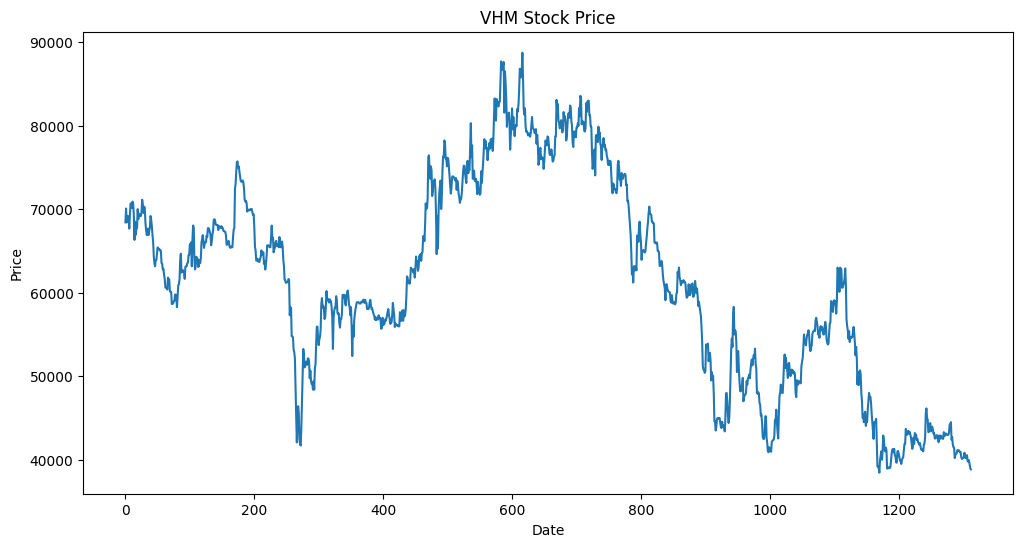

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('VHM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Ratio 7:3

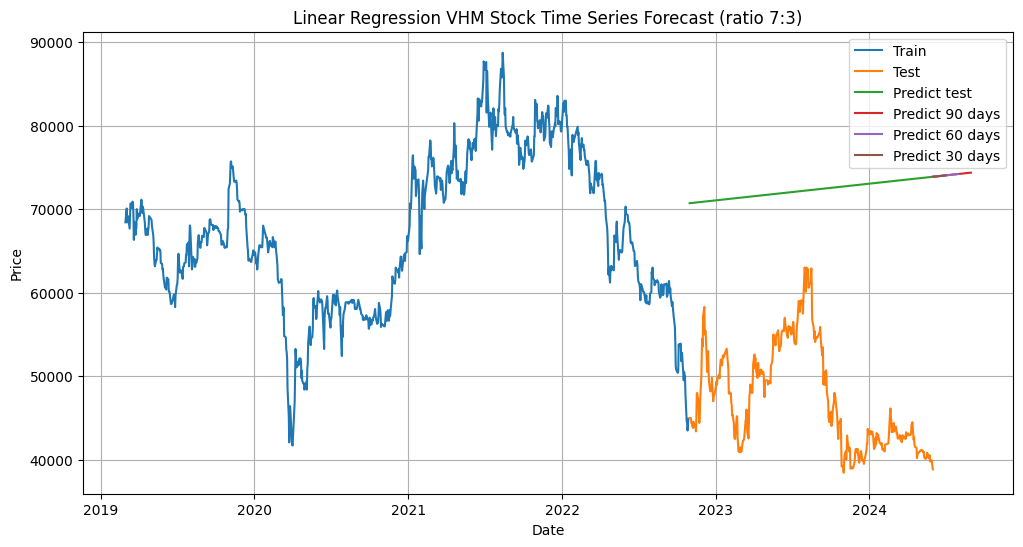

In [33]:
train_data = data[:round(len(data)*70/100)]
test_data = data[round(len(data)*70/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.7)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression VHM Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 25814.265726563306
Testing MAPE: 55.29070232499639
Testing MAE: 24944.84741672933


#### Ratio 8:2

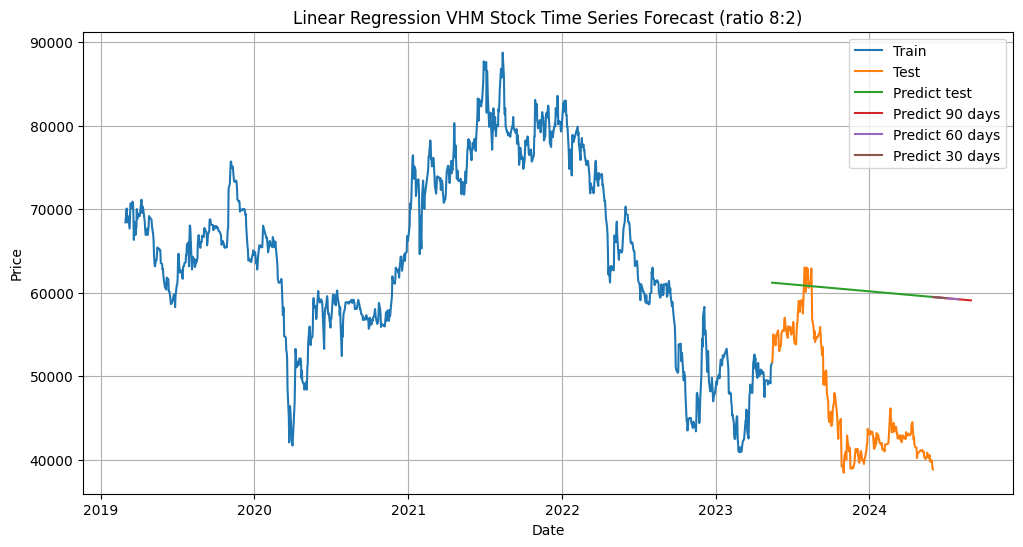

In [35]:
train_data = data[:round(len(data)*80/100)+1]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression VHM Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 14900.19385270237
Testing MAPE: 31.1048163046231
Testing MAE: 13449.045948367413


#### Ratio 9:1

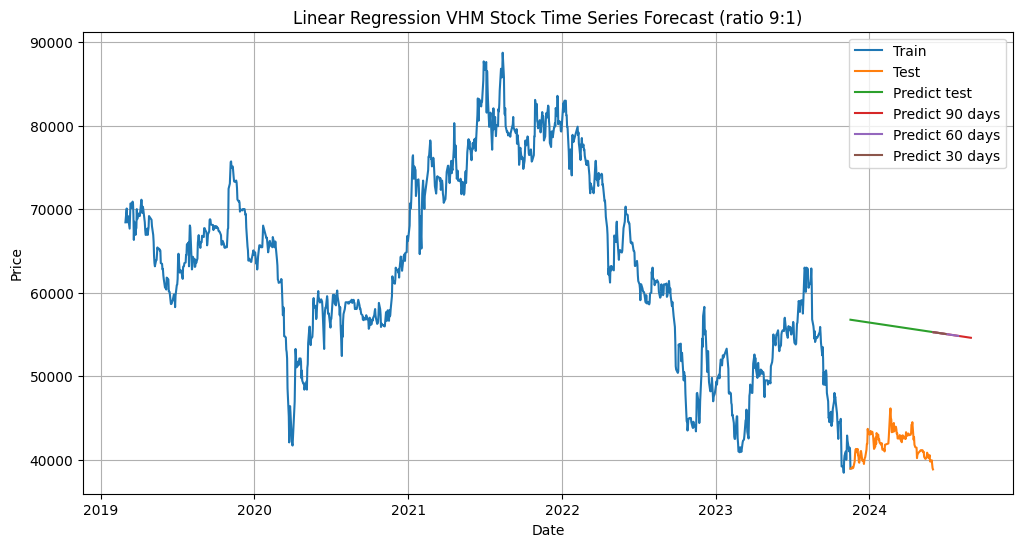

In [37]:
train_data = data[:round(len(data)*90/100)+1]
test_data = data[round(len(data)*90/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.9)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression VHM Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 14328.439546161131
Testing MAPE: 34.24747298603547
Testing MAE: 14233.336494286612


## Dataset: NVL Historical Data

In [39]:
data = pd.read_csv('../Datasets/2 - NVL Historical Data.csv')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

In [40]:
# Format cột "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,32933.0,31765.0,32933.0,31765.0,891.22K,2.95%
1,2019-03-04,33100.0,32933.0,33378.0,32600.0,899.13K,0.51%
2,2019-03-05,32711.0,32989.0,33211.0,32544.0,963.79K,-1.18%
3,2019-03-06,31709.0,32711.0,32711.0,31487.0,1.58M,-3.06%
4,2019-03-07,31932.0,31709.0,32210.0,31709.0,849.59K,0.70%
...,...,...,...,...,...,...,...
1308,2024-05-27,14500.0,14600.0,14600.0,14300.0,7.87M,0.35%
1309,2024-05-28,14500.0,14500.0,14600.0,14350.0,11.43M,0.00%
1310,2024-05-29,14150.0,14550.0,14550.0,14150.0,15.86M,-2.41%
1311,2024-05-30,14150.0,14100.0,14200.0,14050.0,13.13M,0.00%


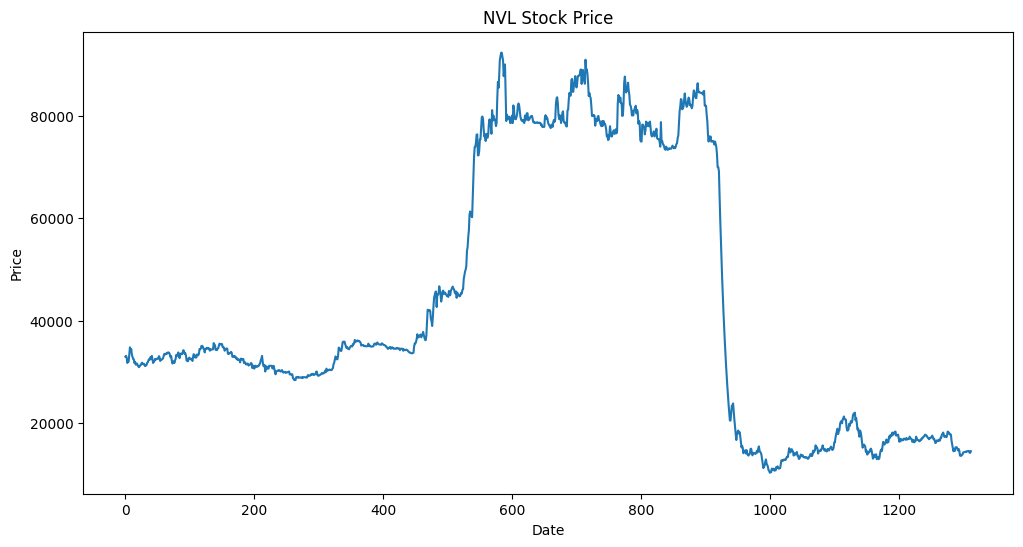

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('NVL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Ratio 7:3

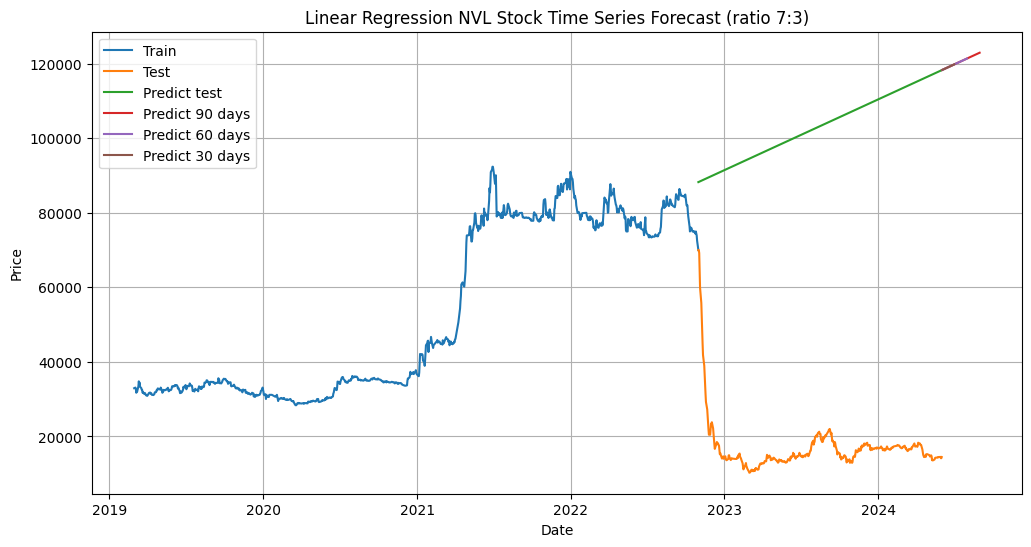

In [42]:
train_data = data[:round(len(data)*70/100)+1]
test_data = data[round(len(data)*70/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.7)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NVL Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 87100.32638911891
Testing MAPE: 557.2315086522705
Testing MAE: 86164.51083863984


#### Ratio 8:2

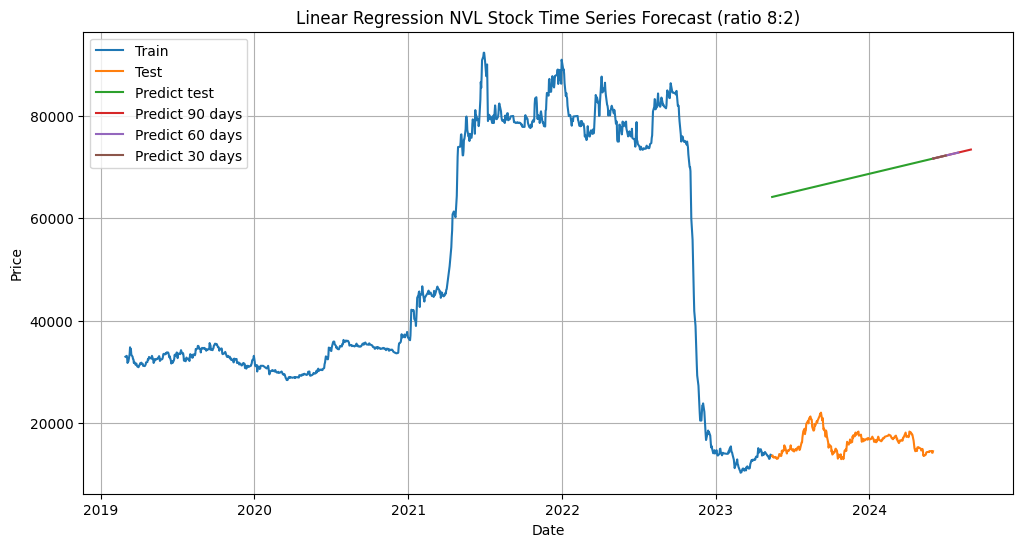

In [44]:
train_data = data[:round(len(data)*80/100)]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NVL Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 51666.930412067435
Testing MAPE: 323.3727097501637
Testing MAE: 51584.50367095918


#### Ratio 9:1

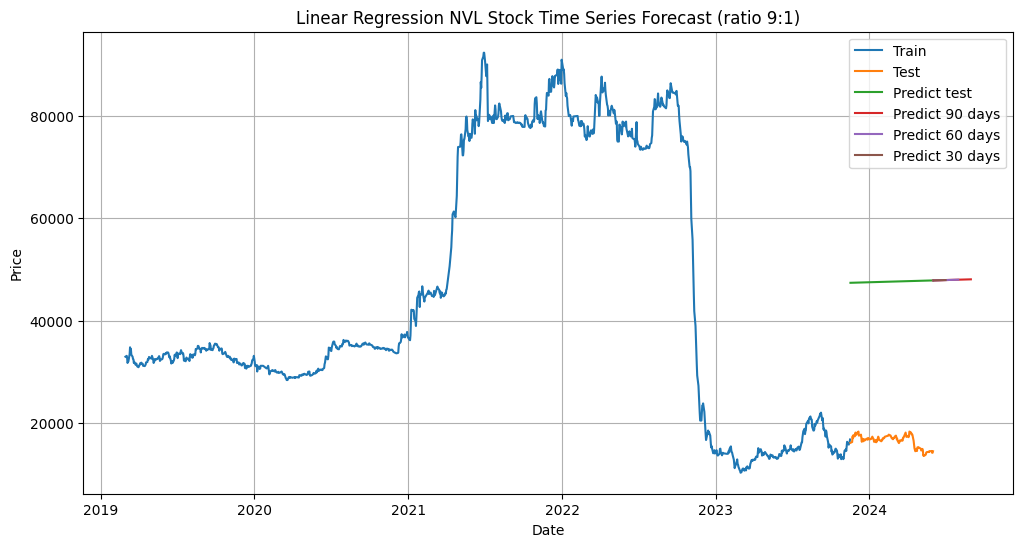

In [46]:
train_data = data[:round(len(data)*90/100)]
test_data = data[round(len(data)*90/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.9)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NVL Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 31168.016645516822
Testing MAPE: 190.77925755722472
Testing MAE: 31140.496168270216


## Dataset: NLG Historical Data

In [48]:
data = pd.read_csv('../Datasets/3 - NLG Historical Data.csv')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

In [49]:
# Format cột "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,18706.8,18496.6,18776.9,18496.6,365.80K,1.14%
1,2019-03-04,19127.2,18706.8,19127.2,18636.7,1.08M,2.25%
2,2019-03-05,18917.0,19127.2,19127.2,18846.9,468.76K,-1.10%
3,2019-03-06,18846.9,18987.1,19057.1,18811.9,225.18K,-0.37%
4,2019-03-07,18706.8,18846.9,18987.1,18671.8,453.92K,-0.74%
...,...,...,...,...,...,...,...
1308,2024-05-27,43900.0,43900.0,44200.0,43000.0,1.56M,0.00%
1309,2024-05-28,43701.0,43404.0,44047.0,43108.0,2.20M,-0.45%
1310,2024-05-29,44400.0,43900.0,44600.0,43500.0,2.84M,1.60%
1311,2024-05-30,43700.0,43350.0,44050.0,42950.0,1.73M,-1.58%


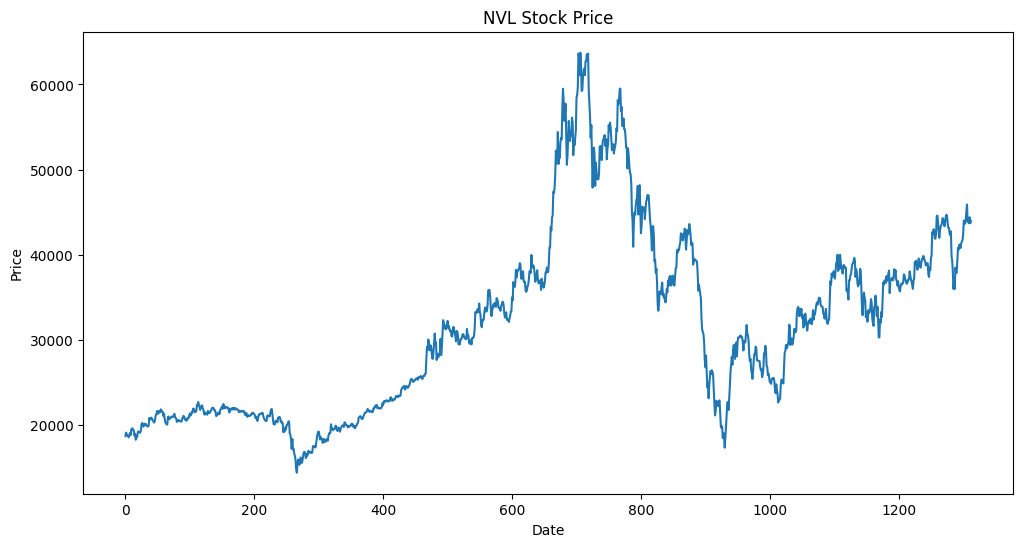

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('NVL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Ratio 7:3

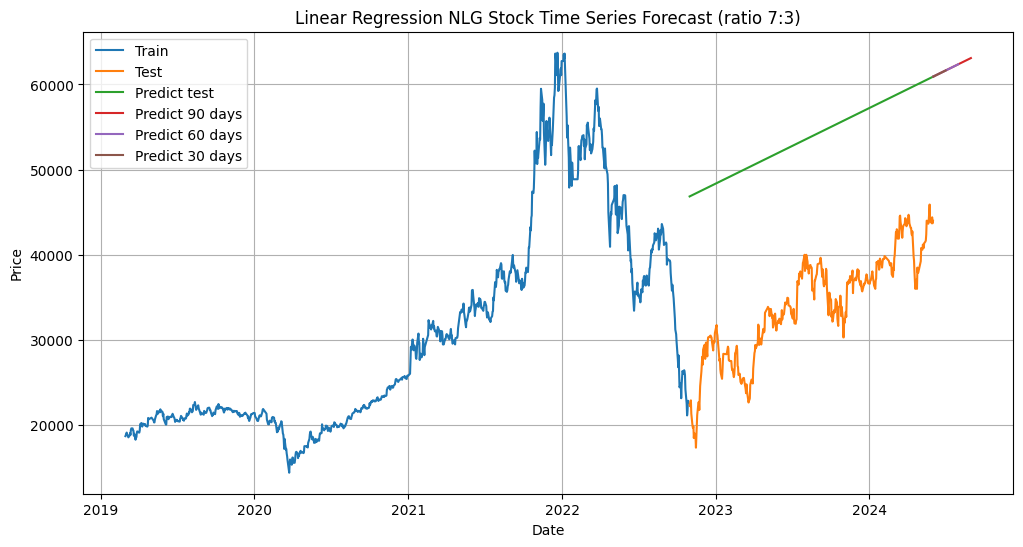

In [51]:
train_data = data[:round(len(data)*70/100)]
test_data = data[round(len(data)*70/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.7)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NLG Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 20076.151569762365
Testing MAPE: 62.13474758173037
Testing MAE: 19835.049965395632


#### Ratio 8:2

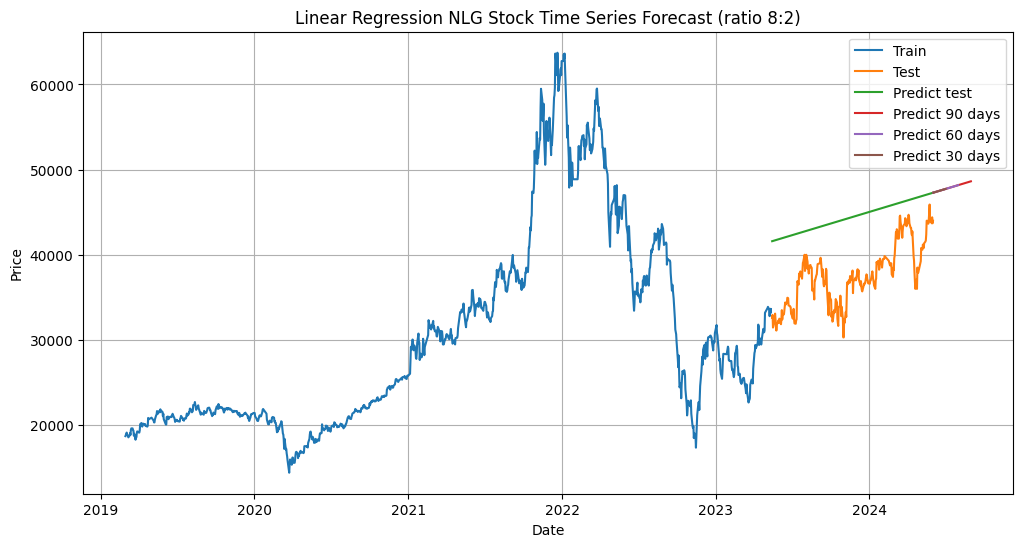

In [53]:
train_data = data[:round(len(data)*80/100)]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NLG Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 7418.296676422697
Testing MAPE: 19.328954227957777
Testing MAE: 6940.703956780655


#### Ratio 9:1

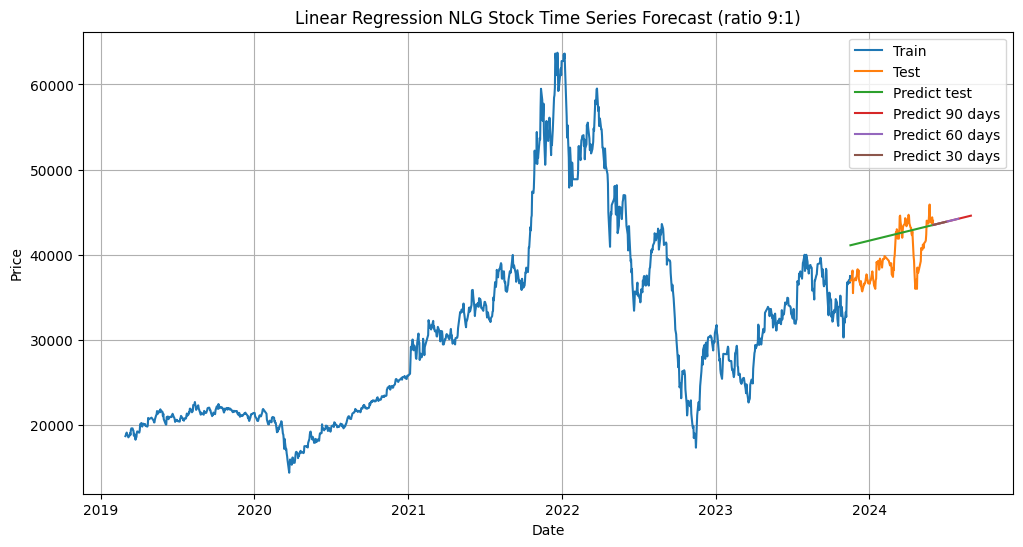

In [55]:
train_data = data[:round(len(data)*90/100)]
test_data = data[round(len(data)*90/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.9)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Price'], label='Train')
plt.plot(test_data['Date'], test_data['Price'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Predict prices for the next 60 days
last_date = data['Date'].iloc[-1]
next_60_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Predict prices for the next 90 days
last_date = data['Date'].iloc[-1]
next_90_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

plt.plot(next_90_days, y_next_90_days, label='Predict 90 days')
plt.plot(next_60_days, y_next_60_days, label='Predict 60 days')
plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NLG Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 3411.8433524463335
Testing MAPE: 7.629304998740183
Testing MAE: 2910.8229593677556
